-12.324688522651577


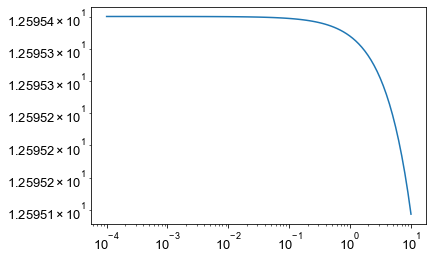

In [46]:
import numpy as np
import matplotlib.pyplot as plt

alpha_Ne = 0.401
beta_Ne = -43.36
nu_ca = 13.30
nu_s = -7.18
lambda_sio2 = -770.13
k_sio2 = -2.06e-6
V_Ne = 26.5
M_Ne = 60.09
T_ref = 1300 #degree
P_ref = 0.1  #MPa

def lnk_Ne(T,P):
    fun = nu_ca + nu_s + lambda_sio2*(1/T - 1/T_ref) + k_sio2*(P - P_ref)*10
    result = alpha_Ne*(100 - 100/(M_Ne*107.67/240.36)*fun)+beta_Ne
    return result

print(lnk_Ne(1227,1.02334021e-05))



P_list = np.logspace(-4, 1,100)
lnk_Ne_list = lnk_Ne(1727,P_list)
plt.loglog(P_list,-lnk_Ne(1727,P_list))
#plt.xscale('log')

plt.show()
    

[-31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844055 -31.05844055 -31.05844055 -31.05844055 -31.05844055
 -31.05844

C:\Users\wangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: UserWarning: No contour levels were found within the data range.


NameError: name 'S_Ne' is not defined

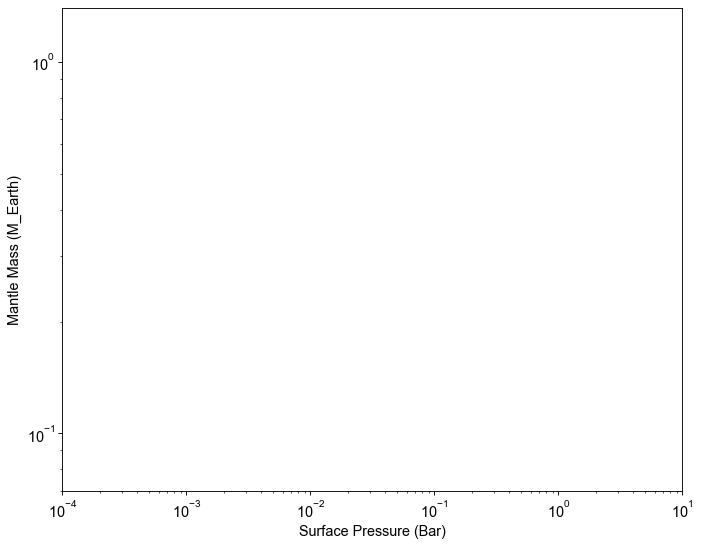

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker, cm, colors

M_Earth = 5.972e+27

SMALL_SIZE = 13
matplotlib.rc('font',size = SMALL_SIZE, family = 'Arial')
matplotlib.rc('axes',titlesize = SMALL_SIZE)

hfont = {'fontname':'Helvetica'}


#actual Ne_reservoir: 64.5e15, we want to see the core_mass and pressure to dissolve other amount of Ne. 

#from Iacono-Marziano paper #the henry constant
x_Ne = 2.1e-5 #from Olsen paper #molar ratio

N = 500
P_new = np.logspace(-4, 1, N)
P_Mpa_new = P_new/10
M_co = np.logspace(-1, 0.3, N)*0.7


M_Ne = 20.1797

print(lnk_Ne(1727,P_Mpa_new))

#total_mole = np.asarray(Ne_reserve)/M_Ne/x_Ne #mol
#total_mole_mass = x_H2*total_mole*M_H2 + x_He*total_mole*M_He + x_Ne*total_mole*M_Ne

def Ne_Plot(T):


    def Ne_res(M_core, P):
        #Ne_con = 3.42e-14
        S_Ne = np.exp(-lnk_Ne(T,P))
        return M_core*P/S_Ne*x_Ne*5.972e+24*1000 #g


    X, Y = np.meshgrid(M_co, P_Mpa_new)
    Z =Ne_res(X, Y)
    
    print(Z)

    X_2, Y_2 = np.meshgrid(M_co, P_new)

    print(P_Mpa_new)
    S_N = lnk_Ne(1227,P_Mpa_new)
    print(S_N)


    fig, ax = plt.subplots(figsize = (10, 8), dpi = 80)
    origin = 'lower'

    #lev_exp = np.arange(np.floor(np.log10(Z.min())-1), np.ceil(np.log10(Z.max())+1))
    lev_exp = np.arange(11, 19, 0.2)
    levs = np.power(10, lev_exp)
    print(lev_exp)
    cs = ax.contourf(Y_2, X, Z, levs, norm=colors.LogNorm())
    #cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
    ax.set_xlabel('Surface Pressure (Bar)')
    ax.set_ylabel('Mantle Mass (M_Earth)')
    ax.set_yscale('log')
    ax.set_xscale('log')

    ee = np.arange(11, 19, 1)
    levss = np.power(10., ee)

    CS4 = ax.contour(Y_2, X, Z, levss,
                      colors=('red',),
                      linewidths=(1,),
                      origin=origin)

    Ne_con = 3.42e-14
    Ne_total = 2.735*10**(15) #g #Ne_con*M_co*M_Ne*5.972e+27
    #Ne_pre =Ne_total/M_co*k_Ne_1500/x_Ne/5.972e27*1e-5
    Ne_ATM = Ne_con*M_Ne*5.972e+27 #g
    Earth_Pres = Ne_ATM*np.exp(S_Ne)/x_Ne/5.972e27*10
    #print(f'{Ne_ATM:.3e}')
    #print(f'{Earth_Pres:.3e}')

    #plt.plot(Earth_Pres, 0.7, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="aqua")

    #manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]

    ax.set_title(f'Dissolvable Neon in Deplete Mantle at T = {T}K')
    ax.clabel(CS4, fmt='%2.1e', colors='black', fontsize=12)



    cbar = fig.colorbar(cs)
    cbar.ax.get_yaxis().labelpad = 25
    cbar.ax.set_ylabel('Dissolvable Ne (g)', rotation=270)
    plt.savefig(f"Contour_Core_mass for Reservoir at T = {T}K",dpi=300, bbox_inches='tight')
    plt.show()

T_list = [1726.85, 2226.85, 2726.85, 3226.85]

#for i in range(len(T_list)):
Ne_Plot(1227)